In [1]:
import numpy as np
from sklearn import metrics
import pycaret
from pycaret.datasets import get_data
from pycaret.internal.PycaretExperiment import TimeSeriesExperiment

from sktime.utils.plotting import plot_series

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8edfb7fed0>)

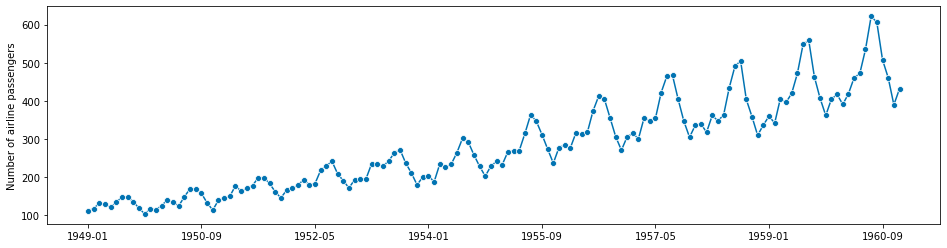

In [2]:
y = get_data('airline', verbose=False)
plot_series(y)

In [3]:
fh = np.arange(1,13)
fold = 3

In [4]:
# Available Models
exp = TimeSeriesExperiment()
exp.models()

,Name,Reference,Turbo
ID,,,
naive,Naive,sktime.forecasting.naive.NaiveForecaster,True
poly_trend,PolyTrend,sktime.forecasting.trend.PolynomialTrendForeca...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
exp_smooth,ExponentialSmoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
theta,Theta,sktime.forecasting.theta.ThetaForecaster,True
ensemble_forecaster,EnsembleForecaster,pycaret.internal.ensemble._EnsembleForecasterW...,True


## Expanding Window Splitter

In [5]:
exp = TimeSeriesExperiment()
exp.setup(data=y, fh=fh, fold=fold, fold_strategy='expandingwindow')
model = exp.create_model("arima")

,test_smape,test_mape_ts
0,0.1987,0.1762
1,0.2036,0.1801
2,0.1720,0.1544
Mean,0.1914,0.1703
SD,0.0139,0.0113


In [6]:
# Internally split 70/30. Need to just keep fh as test set instead of 30%
model.predict()

1957-05    343.054940
1957-06    338.304216
1957-07    333.740190
1957-08    329.355525
1957-09    325.143172
1957-10    321.096361
1957-11    317.208584
1957-12    313.473592
1958-01    309.885382
1958-02    306.438184
1958-03    303.126457
1958-04    299.944878
Freq: M, dtype: float64

## Sliding Window Splitter

In [7]:
exp = TimeSeriesExperiment()
exp.setup(data=y, fh=fh, fold=fold, fold_strategy='slidingwindow')
model = exp.create_model("arima")

,test_smape,test_mape_ts
0,0.1987,0.1762
1,0.2128,0.1874
2,0.1959,0.1737
Mean,0.2025,0.1791
SD,0.0074,0.0059


In [8]:
model.predict()

1957-05    343.054940
1957-06    338.304216
1957-07    333.740190
1957-08    329.355525
1957-09    325.143172
1957-10    321.096361
1957-11    317.208584
1957-12    313.473592
1958-01    309.885382
1958-02    306.438184
1958-03    303.126457
1958-04    299.944878
Freq: M, dtype: float64

## Error Handling

In [9]:
try:
    exp = TimeSeriesExperiment()
    exp.setup(data=y, fh=17, fold=76, fold_strategy='expandingwindow')
except ValueError as error:
    print(error)

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:47:46
Status,. . . . . . . . . . . . . . . . . .,Finalizing Model
Estimator,. . . . . . . . . . . . . . . . . .,EnsembleForecaster


Not Enough Data Points, set a lower number of folds or fh


# Other model types

## Naive

In [10]:
exp = TimeSeriesExperiment()
exp.setup(data=y, fh=fh, fold=fold, fold_strategy='expandingwindow')
model = exp.create_model("naive")
model.predict()

,test_smape,test_mape_ts
0,0.1167,0.1080
1,0.1199,0.1111
2,0.1100,0.1029
Mean,0.1155,0.1073
SD,0.0041,0.0034


1957-05    348.0
1957-06    348.0
1957-07    348.0
1957-08    348.0
1957-09    348.0
1957-10    348.0
1957-11    348.0
1957-12    348.0
1958-01    348.0
1958-02    348.0
1958-03    348.0
1958-04    348.0
Freq: M, dtype: float32

## Polynomial Trend

In [11]:
exp = TimeSeriesExperiment()
exp.setup(data=y, fh=fh, fold=fold, fold_strategy='expandingwindow')
model = exp.create_model("poly_trend")
model.predict()

,test_smape,test_mape_ts
0,0.0966,0.0956
1,0.1104,0.1024
2,0.1193,0.1105
Mean,0.1088,0.1028
SD,0.0093,0.0061


1957-05    336.250909
1957-06    338.585383
1957-07    340.919856
1957-08    343.254329
1957-09    345.588803
1957-10    347.923276
1957-11    350.257750
1957-12    352.592223
1958-01    354.926697
1958-02    357.261170
1958-03    359.595644
1958-04    361.930117
Freq: M, dtype: float64

## Exponential Smoothing

In [12]:
exp = TimeSeriesExperiment()
exp.setup(data=y, fh=fh, fold=fold, fold_strategy='expandingwindow')
model = exp.create_model("exp_smooth")
model.predict()

,test_smape,test_mape_ts
0,0.1167,0.1080
1,0.1199,0.1111
2,0.1100,0.1029
Mean,0.1155,0.1073
SD,0.0041,0.0034


1957-05    348.000005
1957-06    348.000005
1957-07    348.000005
1957-08    348.000005
1957-09    348.000005
1957-10    348.000005
1957-11    348.000005
1957-12    348.000005
1958-01    348.000005
1958-02    348.000005
1958-03    348.000005
1958-04    348.000005
Freq: M, dtype: float64

## AutoETS

In [13]:
# # Does not work either
# exp = TimeSeriesExperiment()
# exp.setup(data=y, fh=fh, fold=fold, fold_strategy='expandingwindow')
# model = exp.create_model("auto_ets")
# model.predict()

## Theta Model

In [14]:
exp = TimeSeriesExperiment()
exp.setup(data=y, fh=fh, fold=fold, fold_strategy='expandingwindow')
model = exp.create_model("theta")
model.predict()

,test_smape,test_mape_ts
0,0.1026,0.0967
1,0.1013,0.0948
2,0.1090,0.1042
Mean,0.1043,0.0986
SD,0.0034,0.0040


1957-05    350.334474
1957-06    351.501710
1957-07    352.668947
1957-08    353.836184
1957-09    355.003420
1957-10    356.170657
1957-11    357.337894
1957-12    358.505131
1958-01    359.672367
1958-02    360.839604
1958-03    362.006841
1958-04    363.174078
Freq: M, dtype: float64

In [15]:
print(exp.pull().loc['Mean', 'test_smape'])

0.1043


## Random Forest (with internal deseasonalize and detrending)

In [16]:
# # Does not work right now
# exp = TimeSeriesExperiment()
# exp.setup(data=y, fh=fh, fold=fold, fold_strategy='expandingwindow')
# model = exp.create_model("rf_dts")
# model.predict()

## Blend Models

In [17]:
arima_model = exp.create_model("arima")
naive_model = exp.create_model("naive")

,test_smape,test_mape_ts
0,0.1167,0.1080
1,0.1199,0.1111
2,0.1100,0.1029
Mean,0.1155,0.1073
SD,0.0041,0.0034


In [18]:
mean_blender = exp.blend_models([arima_model, naive_model], method='mean', optimize='MAPE_ts')

,test_smape,test_mape_ts
0,0.1564,0.1420
1,0.1605,0.1456
2,0.1329,0.1215
Mean,0.1500,0.1364
SD,0.0122,0.0106


In [19]:
median_blender = exp.blend_models([arima_model, naive_model], method='median', optimize='MAPE_ts')

,test_smape,test_mape_ts
0,0.1564,0.1420
1,0.1605,0.1456
2,0.1329,0.1215
Mean,0.1500,0.1364
SD,0.0122,0.0106


In [20]:
voting_blender = exp.blend_models([arima_model, naive_model], method='median', weights=[1.2, 0.7], optimize='MAPE_ts')

,test_smape,test_mape_ts
0,0.1564,0.1420
1,0.1605,0.1456
2,0.1329,0.1215
Mean,0.1500,0.1364
SD,0.0122,0.0106
